In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
da = pd.read_csv("dataset_uas.csv")
da.head()

,kode,daerah,tahun,jumlahdesa,provinsi,danadesa,ipm,orangmiskin,regional,region,tani,growth
0,1,Badung,2015,46,Bali,5734371.0,78.86,14.40,Jawa-Bali,1,2182.00,6.24
1,2,Bangli,2015,68,Bali,8476896.0,66.24,12.74,Jawa-Bali,1,945.73,6.16
2,3,Buleleng,2015,129,Bali,16081170.0,70.03,43.43,Jawa-Bali,1,4048.61,6.07
3,4,Gianyar,2015,64,Bali,7978255.0,75.03,22.89,Jawa-Bali,1,1950.00,6.30
4,5,Jembrana,2015,41,Bali,5111070.0,69.66,15.83,Jawa-Bali,1,1527.50,6.19


In [3]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 12 columns):
kode           531 non-null int64
daerah         531 non-null object
tahun          531 non-null int64
jumlahdesa     531 non-null int64
provinsi       531 non-null object
danadesa       531 non-null float64
ipm            531 non-null float64
orangmiskin    531 non-null float64
regional       531 non-null object
region         531 non-null int64
tani           531 non-null float64
growth         531 non-null float64
dtypes: float64(5), int64(4), object(3)
memory usage: 49.9+ KB


In [4]:
da.describe()

,kode,tahun,jumlahdesa,danadesa,ipm,orangmiskin,region,tani,growth
count,531.000000,531.000000,531.000000,5.310000e+02,531.000000,531.000000,531.000000,531.000000,531.000000
mean,89.000000,2016.000000,199.363465,1.097831e+08,64.824351,93.429944,0.519774,2675.497156,5.746271
std,51.142863,0.817266,112.439106,1.127169e+08,7.412986,83.395774,0.500080,2655.338201,4.895512
min,1.000000,2015.000000,13.000000,1.000000e+00,39.410000,4.380000,0.000000,46.170000,-18.970000
25%,45.000000,2015.000000,102.000000,3.529434e+07,62.035000,24.435000,0.000000,561.065000,5.030000
50%,89.000000,2016.000000,186.000000,8.077624e+07,65.550000,74.850000,1.000000,1976.390000,5.390000
75%,133.000000,2017.000000,271.000000,1.670442e+08,69.283484,141.000000,1.000000,3899.095000,6.040000
max,177.000000,2017.000000,541.000000,1.745276e+09,83.010000,490.800000,1.000000,15612.160000,107.070000


In [5]:
da["log_miskin"] = np.log(da["orangmiskin"])
da["log_pdrbtani"] = np.log(da["tani"])
da["log_ipm"] = np.log(da["ipm"])
da["log_dd"] = np.log(da["danadesa"])
da["log_growth"] = np.log(da["growth"])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [6]:
da.to_csv("dataku.csv")

In [7]:
t2017 = da.loc[da["tahun"] == 2017]
t2017.tail()

,kode,daerah,tahun,jumlahdesa,provinsi,danadesa,ipm,orangmiskin,regional,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth
526,173,Timor Tengah Utara,2017,160,Nusa Tenggara Timur,123029768.0,62.03,58.59,Timur,0,1125.94,5.09,4.070564,7.026374,4.127618,18.627937,1.627278
527,174,Tolikara,2017,541,Papua,406528297.0,47.89,44.47,Timur,0,267.99,4.66,3.794815,5.590950,3.868907,19.823164,1.539015
528,175,Waropen,2017,100,Papua,81865746.0,64.08,9.03,Timur,0,377.41,7.71,2.200552,5.933332,4.160132,18.220591,2.042518
529,176,Yahukimo,2017,510,Papua,384055245.0,47.95,73.27,Timur,0,327.56,6.85,4.294151,5.791671,3.870159,19.766297,1.924249
530,177,Yalimo,2017,300,Papua,230607728.0,46.19,21.18,Timur,0,184.96,5.19,3.053057,5.220140,3.832763,19.256229,1.646734


In [8]:
t2016 = da.loc[da["tahun"]==2016]
t2016.tail()

,kode,daerah,tahun,jumlahdesa,provinsi,danadesa,ipm,orangmiskin,regional,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth
441,173,Timor Tengah Utara,2016,160,Nusa Tenggara Timur,96493772.0,61.54,59.34,Timur,0,1083.33,4.84,4.083284,6.987795,4.119687,18.384989,1.576915
442,174,Tolikara,2016,541,Papua,320044266.0,47.11,45.33,Timur,0,260.58,4.62,3.813969,5.562910,3.852485,19.583970,1.530395
443,175,Waropen,2016,100,Papua,64138009.0,63.10,8.97,Timur,0,360.79,9.47,2.193886,5.888296,4.144721,17.976548,2.248129
444,176,Yahukimo,2016,510,Papua,300500872.0,47.13,74.54,Timur,0,323.85,5.20,4.311336,5.780280,3.852910,19.520961,1.648659
445,177,Yalimo,2016,300,Papua,181971341.0,44.95,21.36,Timur,0,178.99,6.83,3.061520,5.187330,3.805551,19.019360,1.921325


In [9]:
t2015 = da.loc[da["tahun"]==2015]
t2015.tail()

,kode,daerah,tahun,jumlahdesa,provinsi,danadesa,ipm,orangmiskin,regional,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth
356,173,Timor Tengah Utara,2015,160,Nusa Tenggara Timur,12085523.0,60.96,61.96,Timur,0,1050.72,4.70,4.126489,6.957231,4.110218,16.307519,1.547563
357,174,Tolikara,2015,541,Papua,133231549.0,46.38,45.72,Timur,0,254.34,4.87,3.822536,5.538672,3.836868,18.707599,1.583094
358,175,Waropen,2015,100,Papua,17485102.0,62.35,8.89,Timur,0,344.79,9.66,2.184927,5.842936,4.132764,16.676860,2.267994
359,176,Yahukimo,2015,510,Papua,125597209.0,46.63,74.37,Timur,0,324.76,7.14,4.309053,5.783086,3.842244,18.648591,1.965713
360,177,Yalimo,2015,300,Papua,73880711.0,44.32,21.36,Timur,0,174.16,8.88,3.061520,5.159974,3.791436,18.117962,2.183802


In [10]:
t2017.describe()

,kode,tahun,jumlahdesa,danadesa,ipm,orangmiskin,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth
count,177.000000,177.0,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,174.000000
mean,89.000000,2017.0,199.361582,1.615399e+08,65.470339,91.917119,0.519774,2748.623107,5.315367,4.050479,7.346694,4.174772,18.643965,1.685257
std,51.239633,0.0,112.639632,9.190167e+07,7.317625,81.008229,0.501026,2726.588510,2.408689,1.080718,1.187379,0.120304,0.980948,0.246483
min,1.000000,2017.0,14.000000,1.260921e+05,41.060000,4.500000,0.000000,47.990000,-18.970000,1.504077,3.870993,3.715034,11.744768,0.207014
25%,45.000000,2017.0,102.000000,8.186575e+07,62.390000,25.360000,0.000000,587.470000,5.070000,3.233173,6.375825,4.133405,18.220591,1.623833
50%,89.000000,2017.0,186.000000,1.523363e+08,66.110000,74.850000,1.000000,2032.340000,5.400000,4.315486,7.616943,4.191320,18.841601,1.688247
75%,133.000000,2017.0,271.000000,2.225356e+08,70.080000,137.770000,1.000000,3953.400000,5.980000,4.925586,8.282331,4.249637,19.220598,1.792174
max,177.000000,2017.0,541.000000,4.065283e+08,83.010000,487.280000,1.000000,15612.160000,16.170000,6.188839,9.655805,4.418961,19.823164,2.783158


In [11]:
t2016.describe()

,kode,tahun,jumlahdesa,danadesa,ipm,orangmiskin,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth
count,177.000000,177.0,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,89.000000,2016.0,199.361582,1.365303e+08,64.831864,92.890282,0.519774,2683.835763,5.692768,4.037695,7.317865,4.164549,18.489590,1.670578
std,51.239633,0.0,112.665355,1.402555e+08,7.442563,83.453229,0.501026,2674.254790,2.240245,1.106849,1.192240,0.124202,0.705471,0.454231
min,1.000000,2016.0,13.000000,1.251418e+07,39.960000,4.380000,0.000000,47.170000,0.080000,1.477049,3.853758,3.687879,16.342373,-2.525729
25%,45.000000,2016.0,102.000000,6.908052e+07,62.060000,24.280000,0.000000,559.860000,5.030000,3.189653,6.327687,4.128102,18.050783,1.615420
50%,89.000000,2016.0,186.000000,1.212933e+08,65.550000,74.540000,1.000000,1982.710000,5.380000,4.311336,7.592220,4.182813,18.613722,1.682688
75%,133.000000,2016.0,271.000000,1.775771e+08,69.260000,140.450000,1.000000,3860.770000,5.990000,4.944852,8.258622,4.237868,18.994916,1.790091
max,177.000000,2016.0,541.000000,1.745276e+09,82.580000,490.800000,1.000000,15378.280000,23.530000,6.196037,9.640711,4.413768,21.280178,3.158276


In [12]:
t2015.describe()

,kode,tahun,jumlahdesa,danadesa,ipm,orangmiskin,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth
count,177.000000,177.0,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,89.000000,2015.0,199.367232,3.127907e+07,64.170850,95.482429,0.519774,2594.032599,6.230678,4.059895,7.286702,4.154110,16.868112,1.708250
std,51.239633,0.0,112.650584,2.303857e+07,7.462769,86.081311,0.501026,2575.760153,7.805408,1.110464,1.189686,0.125835,1.528861,0.375314
min,1.000000,2015.0,14.000000,1.000000e+00,39.410000,5.050000,0.000000,46.170000,1.250000,1.619388,3.832330,3.674020,0.000000,0.223144
25%,45.000000,2015.0,102.000000,1.341704e+07,61.240000,24.020000,0.000000,542.500000,4.980000,3.178887,6.296188,4.114801,16.412036,1.605430
50%,89.000000,2015.0,186.000000,2.676401e+07,64.920000,74.850000,1.000000,1952.980000,5.400000,4.315486,7.577112,4.173156,17.102569,1.686399
75%,133.000000,2015.0,271.000000,4.225105e+07,68.510000,146.000000,1.000000,3763.230000,6.140000,4.983607,8.233033,4.226980,17.559140,1.814825
max,177.000000,2015.0,541.000000,1.332315e+08,82.240000,487.100000,1.000000,14958.590000,107.070000,6.188469,9.613041,4.409642,18.707599,4.673483


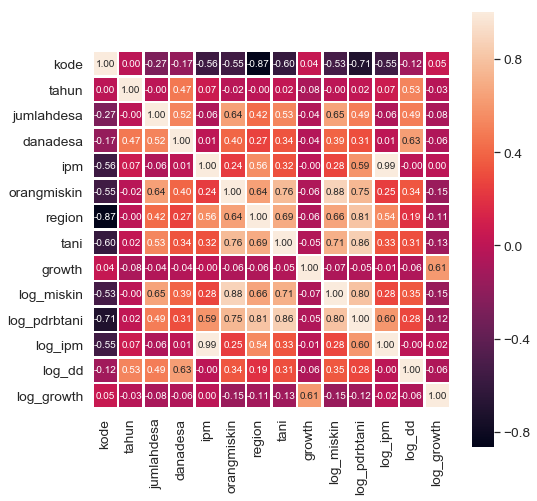

In [13]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.25)
sns.heatmap(da.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

<Figure size 792x792 with 0 Axes>

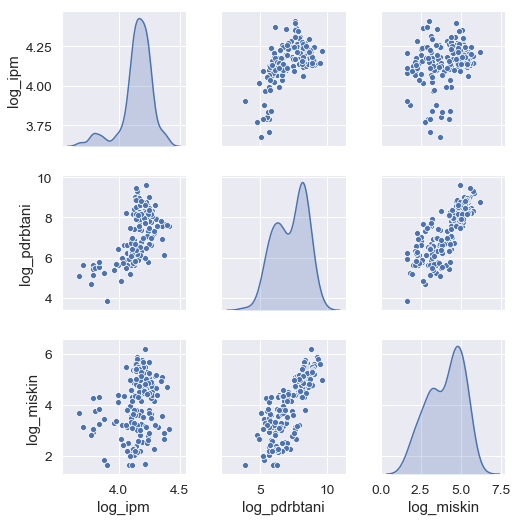

In [14]:
plt.figure(figsize=(11, 11))
sns.pairplot(t2015[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

<Figure size 792x792 with 0 Axes>

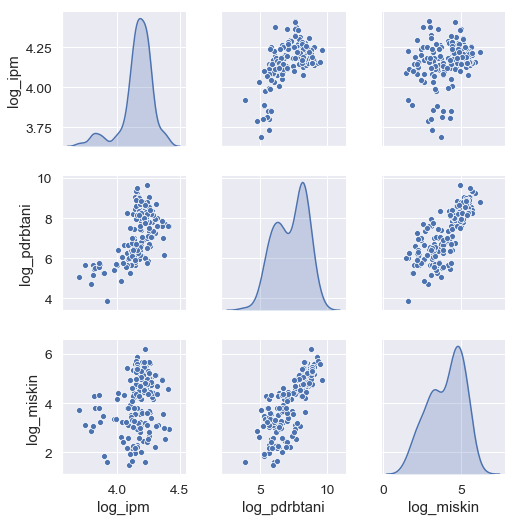

In [15]:
plt.figure(figsize=(11, 11))
sns.pairplot(t2016[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

<Figure size 792x792 with 0 Axes>

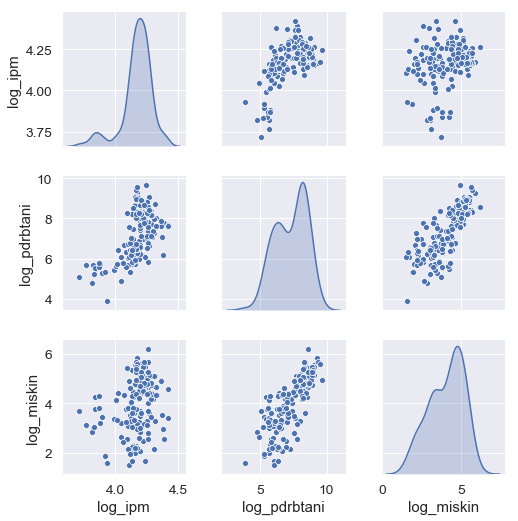

In [16]:
plt.figure(figsize=(11, 11))
sns.pairplot(t2017[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

In [17]:
timur = da.loc[da["region"] == 0]
jb = da.loc[da["region"] == 1]
timur.head()

,kode,daerah,tahun,jumlahdesa,provinsi,danadesa,ipm,orangmiskin,regional,region,tani,growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_growth
276,93,Alor,2015,158,Nusa Tenggara Timur,13639376.0,58.50,45.83,Timur,0,514.78,4.86,3.824939,6.243740,4.069027,16.428471,1.581038
277,94,Asmat,2015,221,Papua,54425457.0,46.62,25.05,Timur,0,296.48,4.79,3.220874,5.691980,3.842030,17.812343,1.566530
278,95,Belu,2015,69,Nusa Tenggara Timur,16919732.0,60.54,34.75,Timur,0,562.27,5.34,3.548180,6.331982,4.103304,16.643991,1.675226
279,96,Biak Numfor,2015,254,Papua,63044874.0,70.85,37.76,Timur,0,769.15,6.62,3.631250,6.645286,4.260565,17.959357,1.890095
280,97,Bima,2015,191,Nusa Tenggara Barat,31355656.0,63.48,73.71,Timur,0,3145.73,6.36,4.300138,8.053801,4.150725,17.260905,1.850028


<Figure size 792x792 with 0 Axes>

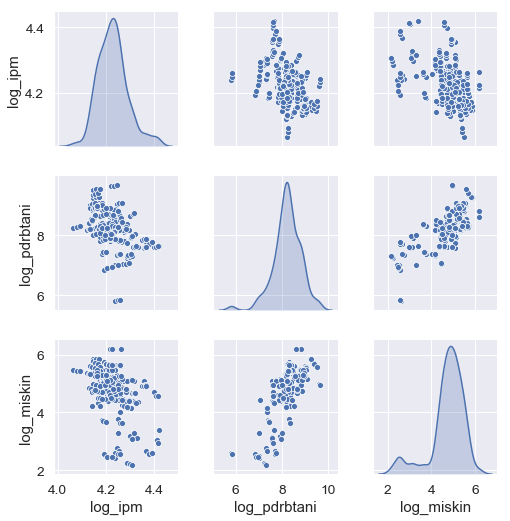

In [18]:
plt.figure(figsize=(11, 11))
sns.pairplot(jb[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

<Figure size 792x792 with 0 Axes>

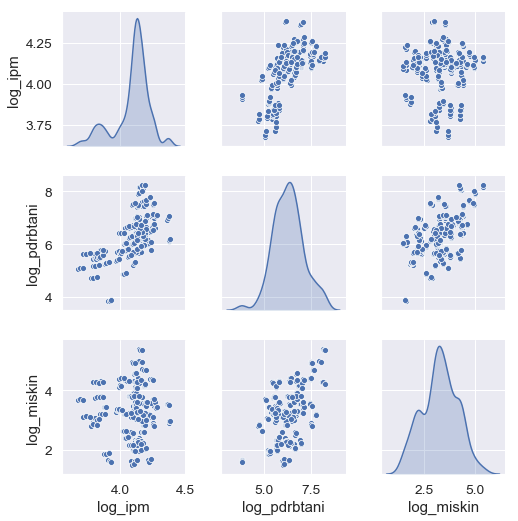

In [19]:
plt.figure(figsize=(11, 11))
sns.pairplot(timur[['log_ipm', "log_pdrbtani", "log_miskin"]], diag_kind="kde")
plt.show()

In [20]:
coba = da[['log_ipm', "log_pdrbtani", "log_miskin", "regional"]]

In [21]:
desa = da[["jumlahdesa", "orangmiskin", "danadesa", "regional"]]

<Figure size 792x792 with 0 Axes>

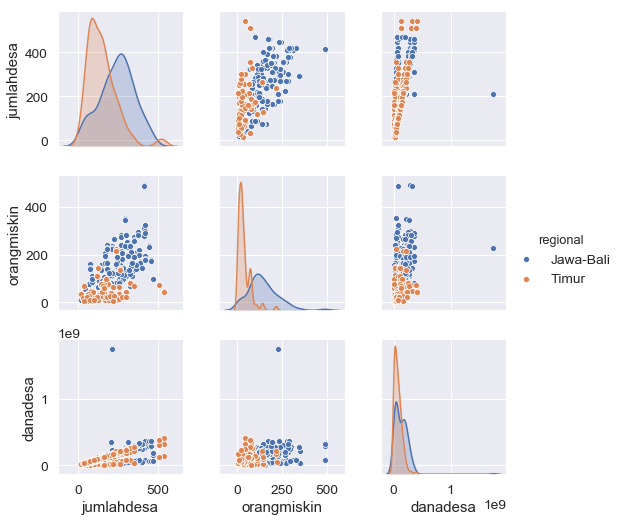

In [22]:
plt.figure(figsize=(11, 11))
sns.pairplot(desa, diag_kind="kde", hue="regional")
plt.show()

<Figure size 792x792 with 0 Axes>

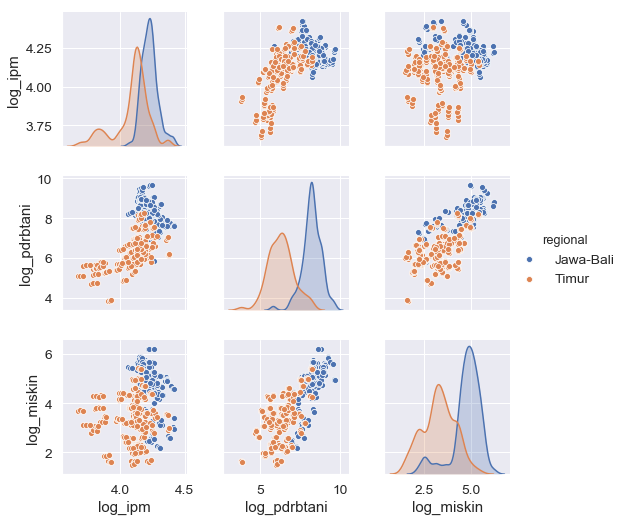

In [23]:
plt.figure(figsize=(11, 11))
sns.pairplot(coba, diag_kind="kde", hue="regional")
plt.show()

<Figure size 936x936 with 0 Axes>

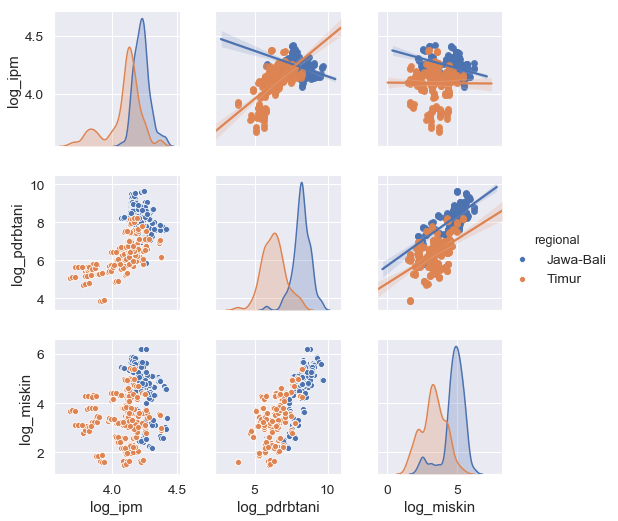

In [24]:
plt.figure(figsize=(13, 13))
e = sns.pairplot(coba, diag_kind="kde", hue="regional")
e.map_upper(sns.regplot)
plt.show()

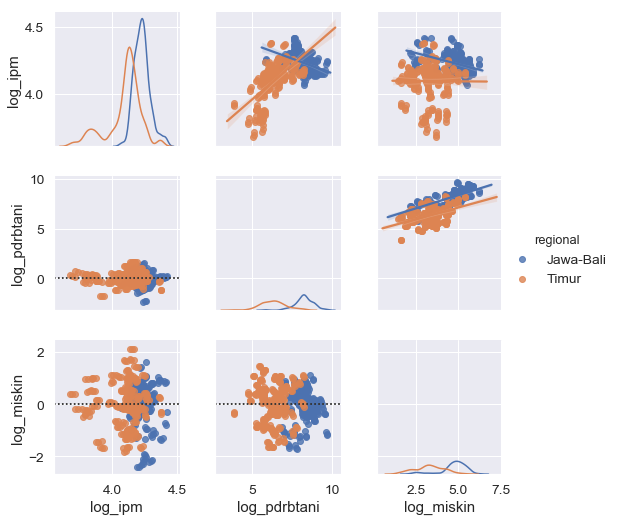

In [25]:
g = sns.PairGrid(coba, hue="regional") 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(sns.kdeplot) 

g.add_legend() 
g.set(alpha=0.5)

In [26]:
desa["ddpermis"] = np.log(desa["danadesa"] / desa["orangmiskin"])
desa["ddperdesa"] = np.log(desa["danadesa"] / desa["jumlahdesa"])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


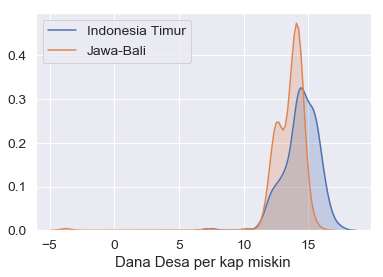

In [27]:
sns.kdeplot(desa.ddpermis[desa.regional=='Timur'], label='Indonesia Timur', shade=True)
sns.kdeplot(desa.ddpermis[desa.regional=='Jawa-Bali'], label='Jawa-Bali', shade=True)
plt.xlabel('Dana Desa per kap miskin');

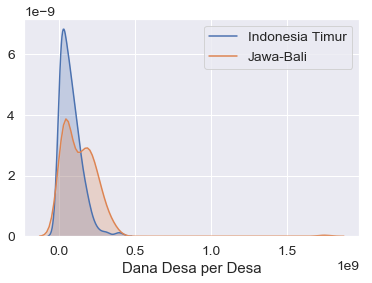

In [28]:
sns.kdeplot(desa.danadesa[desa.regional=='Timur'], label='Indonesia Timur', shade=True)
sns.kdeplot(desa.danadesa[desa.regional=='Jawa-Bali'], label='Jawa-Bali', shade=True)
plt.xlabel('Dana Desa per Desa');